In [32]:
import os
import numpy as np
import pandas

In [33]:
os.chdir("E:\Data Science Project\Cotton Disease Prediction")

In [34]:
os.getcwd()

'E:\\Data Science Project\\Cotton Disease Prediction'

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# importing libraries for deep learning

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
# Re-size all the images

IMAGE_SIZE = [224,224]

train_path = 'train'
valid_path = 'test'


In [7]:
#Adding preprocessing layer in front of ResNet50 and using "imagenet" weights

resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [8]:
# Don't train existing weights as we are using imagenet weights

for layer in resnet.layers:
    layer.trainable = False

In [9]:
# Useful for getting number of output classes

folders = glob('train/*')
len(folders)

4

In [10]:
# Our layers - we can add more if we want

x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

#creating a model object
model = Model(inputs=resnet.input, outputs = prediction)

In [12]:
# To view the structure of the model

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# Telling the model what cost and optimization method to use

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [14]:
# Using the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure to provide the same target size as initialised for the image size

training_set = train_datagen.flow_from_directory('train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')


Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [17]:
# Fit the model

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 176s 3s/step - loss: 3.6081 - accuracy: 0.3716 - val_loss: 1.2562 - val_accuracy: 0.5556
Epoch 2/20
61/61 [==============================] - 176s 3s/step - loss: 1.1062 - accuracy: 0.5520 - val_loss: 0.8892 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 185s 3s/step - loss: 0.9953 - accuracy: 0.6023 - val_loss: 1.1262 - val_accuracy: 0.5000
Epoch 4/20
61/61 [==============================] - 173s 3s/step - loss: 0.8778 - accuracy: 0.6468 - val_loss: 0.7377 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 165s 3s/step - loss: 0.7967 - accuracy: 0.6776 - val_loss: 0.7364 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 172s 3s/step - loss: 0.8630 - accuracy: 0.6797 - val_loss: 0.9146 - val_accuracy: 0.7222
Epoch 7/20
61/61 [==============================] - 182s 3s/step - loss: 0.798

In [21]:
import matplotlib.pyplot as plt

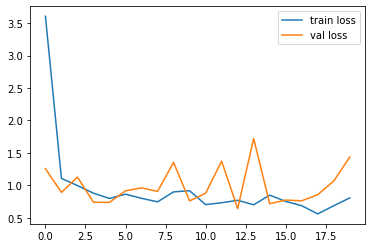

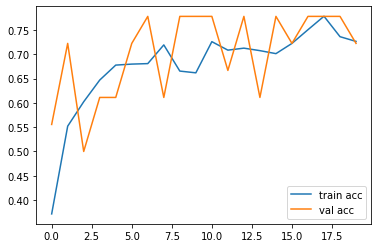

<Figure size 432x288 with 0 Axes>

In [22]:
#Plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_Loss')

#plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# Save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [24]:
y_pred = model.predict(test_set)
y_pred

array([[1.21164285e-02, 9.23543274e-01, 5.51106669e-02, 9.22966469e-03],
       [4.27650720e-01, 4.91762906e-03, 9.20708477e-02, 4.75360781e-01],
       [1.99716445e-02, 1.37063880e-02, 9.66267765e-01, 5.42577291e-05],
       [8.28796590e-04, 9.94586825e-01, 4.51924279e-03, 6.52301314e-05],
       [2.01744749e-03, 9.92035329e-01, 5.61269652e-03, 3.34607117e-04],
       [2.97263917e-03, 3.48282605e-03, 9.93518889e-01, 2.55381910e-05],
       [8.48540803e-04, 9.98888195e-01, 2.85361530e-05, 2.34747116e-04],
       [2.54734010e-02, 7.28790928e-03, 9.67232049e-01, 6.65786729e-06],
       [4.03452711e-03, 9.66077924e-01, 1.14053581e-02, 1.84822027e-02],
       [3.31138596e-02, 9.02432859e-01, 6.42526075e-02, 2.00789393e-04],
       [8.33016783e-02, 6.27883554e-01, 2.32101008e-01, 5.67137599e-02],
       [3.75461951e-03, 9.66970325e-01, 2.31532250e-02, 6.12169178e-03],
       [8.69071111e-03, 5.86756460e-06, 9.91303444e-01, 4.51810109e-08],
       [1.09225475e-04, 1.00268553e-05, 9.99871135e

In [25]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1], dtype=int64)

In [26]:
model = load_model('model_resnet50.h5')

In [37]:
#img = image.load_img('valid_path\diseased cotton leaf\dis_leaf(124).jpg', target_size=(224,224))

In [ ]:
#x = image.img_to_array(img)
#x

In [ ]:
#x.shape

In [ ]:
#x=x/225

In [ ]:
#x=np.expand_dims(x,axis=0)
#img_data = preprocess_input(x)
#img_data.shape

In [ ]:
#model.predict(img_data)

In [ ]:
#a=np.argmax(model.predict(img_data),axis=1)
#a==1